In [1]:
import os, datetime, glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from snappy import ProductIO


In [2]:
#sns.set()
sns.set_style("darkgrid")

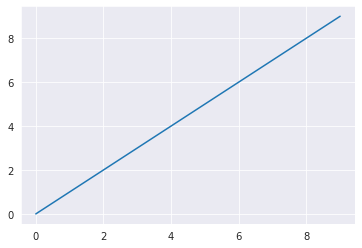

In [3]:
fig, ax = plt.subplots()
ax.plot(np.arange(10), np.arange(10))
ax.grid(color='w', linestyle='solid')


In [4]:
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
# load data
#p_march = ProductIO.readProduct("../ex2/ETM_2000_03_07.tif")
#p_mai = ProductIO.readProduct("../ex2/ETM_2000_05_10.tif")

In [6]:
bands = ["band_1", "band_2", "band_3", "band_4", "band_5", "band_6", "band_7"]

In [7]:
#band2 = p_march.getBand("band_2")

In [8]:
#band2

band_1
band_2
band_3
band_4
band_5
band_6
band_7


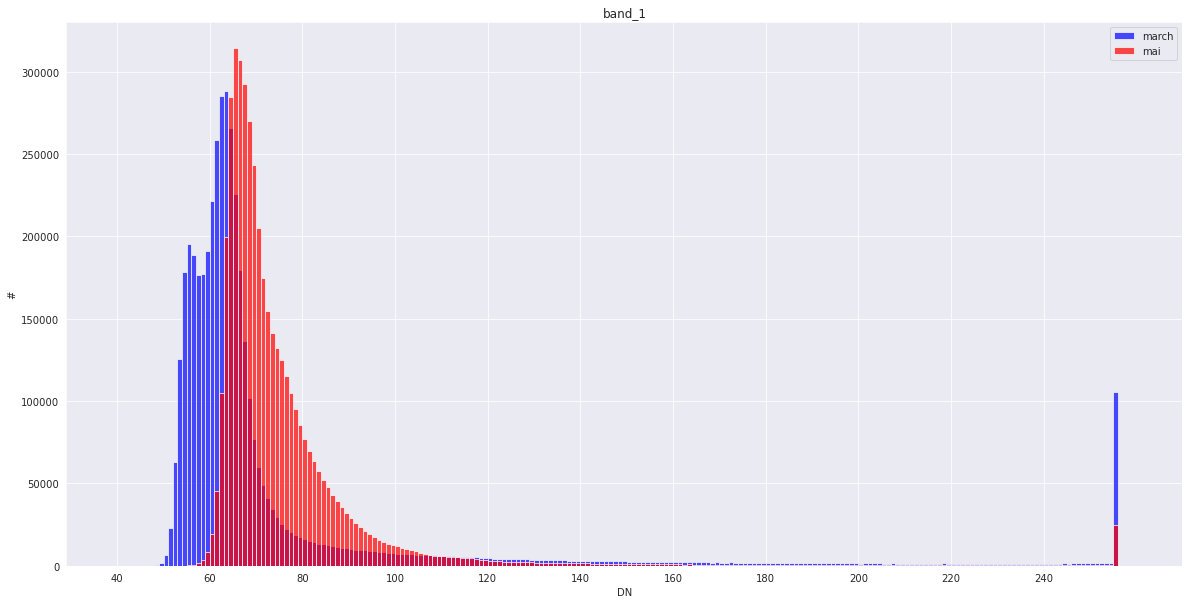

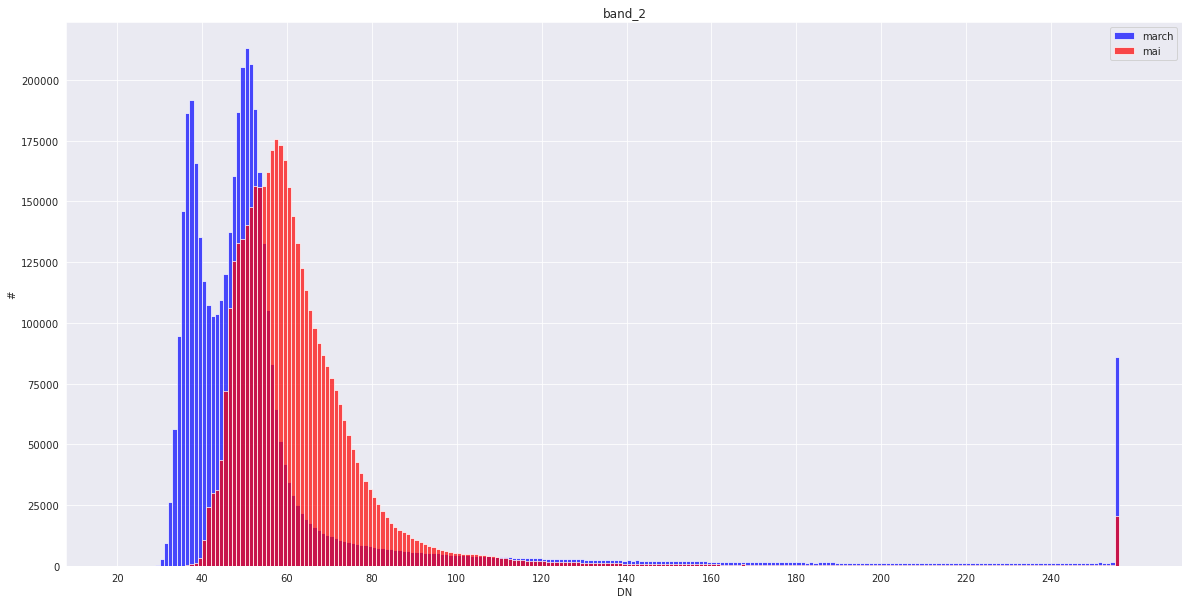

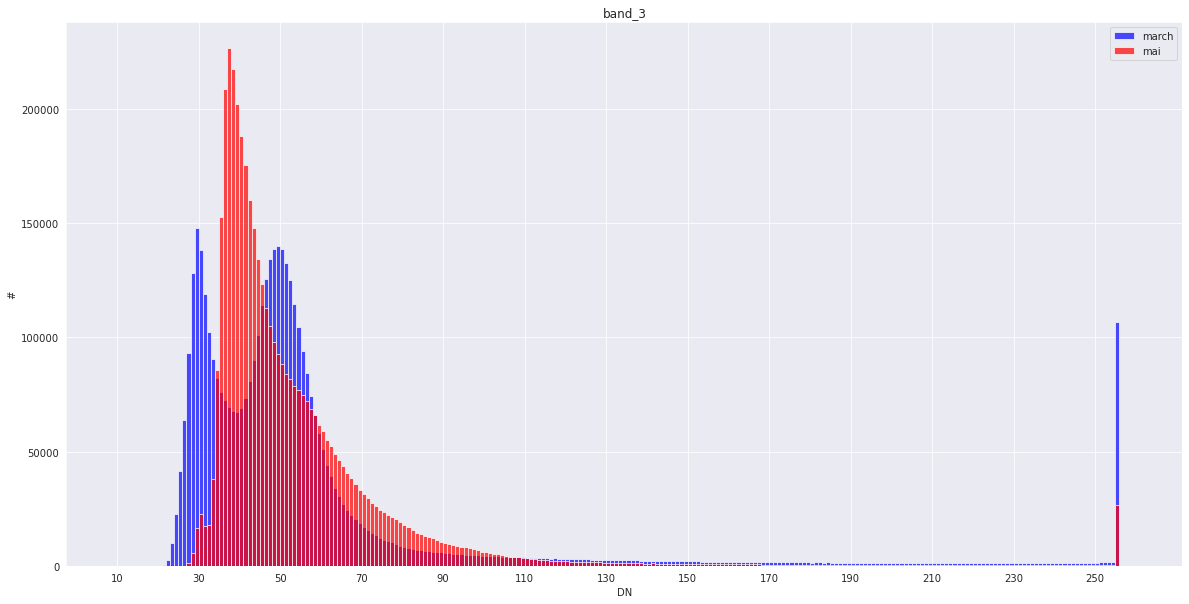

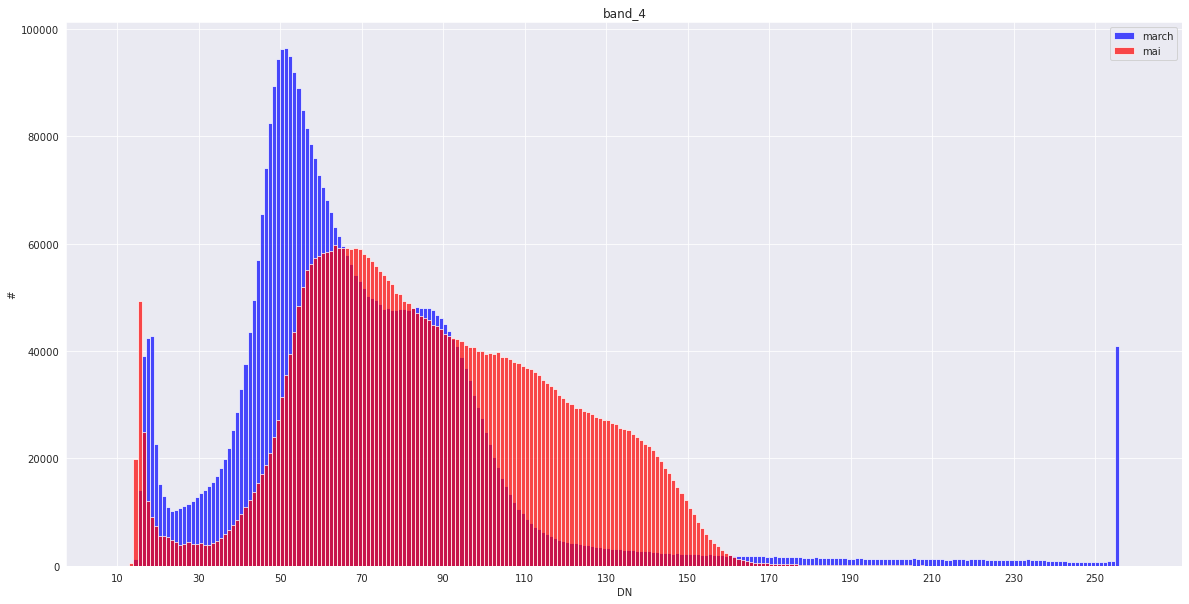

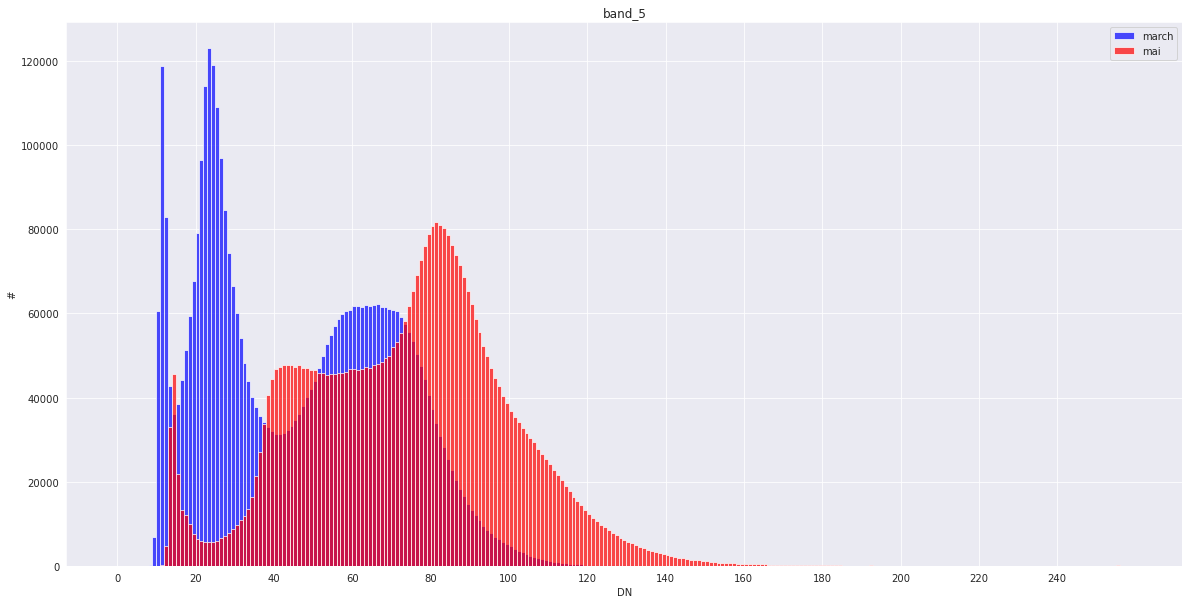

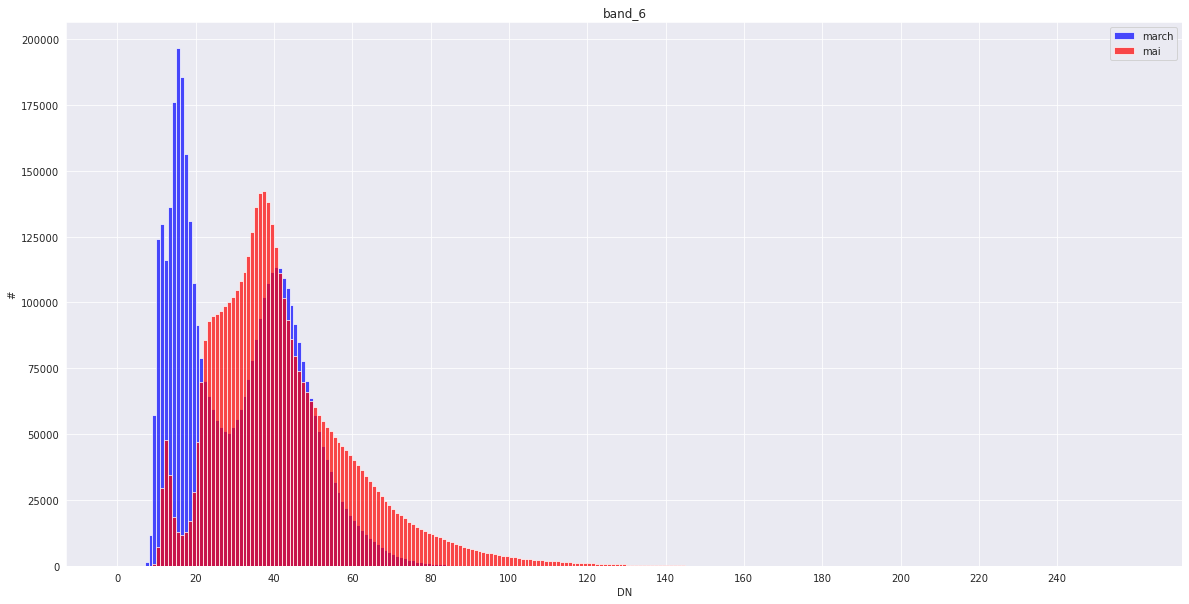

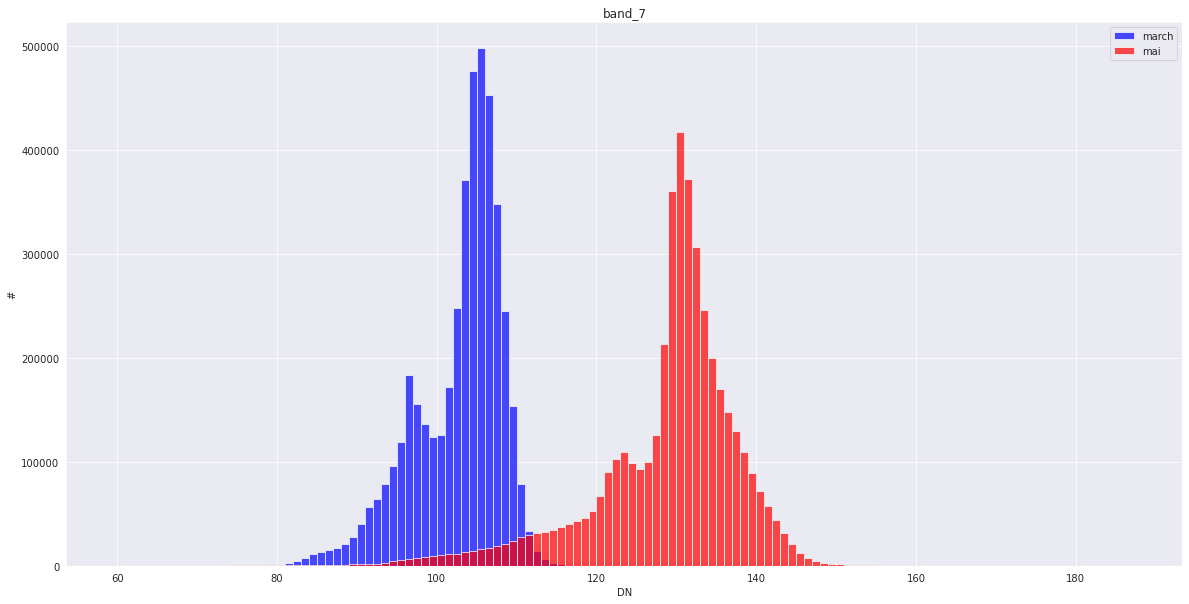

In [11]:
for band in bands:
    print(band)
    
    # load march data
    p_march = ProductIO.readProduct("../ex2/ETM_2000_03_07.tif")
    march_band = p_march.getBand(band)
    
    # Determine Dimensions
    w, h = march_band.getRasterWidth(), march_band.getRasterHeight()
    
    # generate a python data structure and load data into it
    march_band_data = np.zeros(w * h, np.float32)
    march_band.readPixels(0, 0, w, h, march_band_data)
    p_march.dispose()

    # transform the 1D Array into a 2D array
    march_band_data.shape = h, w
    
    
    # load mai data
    p_mai = ProductIO.readProduct("../ex2/ETM_2000_05_10.tif")
    mai_band = p_mai.getBand(band)
    
    # Determine Dimensions
    w, h = mai_band.getRasterWidth(), mai_band.getRasterHeight()
    
    # generate a python data structure and load data into it
    mai_band_data = np.zeros(w * h, np.float32)
    mai_band.readPixels(0, 0, w, h, mai_band_data)
    p_mai.dispose()

    # transform the 1D Array into a 2D array
    mai_band_data.shape = h, w
    
    
    # plot
    fig, ax = plt.subplots(1, 1)
    ax.set_xlabel("DN")
    ax.set_ylabel("#")
    
    min = march_band_data.flatten().min()
    if mai_band_data.flatten().min() < min:
        min = mai_band_data.flatten().min()
    
    rest = min%10
    min = min -rest

    max = march_band_data.flatten().max()
    if mai_band_data.flatten().max() > max:
        max = mai_band_data.flatten().max()
    
    rest = max%10
    max = max +rest
    
    ax.hist(march_band_data.flatten(), np.arange(min, max), alpha=0.7, label="march", color='b')
    ax.hist(mai_band_data.flatten(), np.arange(min, max), alpha=0.7, label="mai", color='r')

    ax.legend()
    ax.set_title(band)
    ax.set_xticks(np.arange(min, max, 20))
    
    plt.savefig("../ex2/"+band+".png", dpi=300 )
    

In [10]:
# Determine Dimensions
w = band1.getRasterWidth()
h = band1.getRasterHeight()

NameError: name 'band1' is not defined

In [ ]:
# generate a python data structure and load data into it
band1_data = np.zeros(w * h, np.float32)
band1.readPixels(0, 0, w, h, band1_data)
p.dispose()

# transform the 1D Array into a 2D array
band1_data.shape = h, w

In [ ]:
imgplot = plt.imshow(band1_data)

In [ ]:
fig, ax = plt.subplots(1, 1)
n, bins, pathches = ax.hist(band1_data.flatten(), np.arange(256), alpha=0.7)


In [ ]:
bins

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.hist(x=band1_hist[0], bins=band1_hist[1])